<a href="https://colab.research.google.com/github/altamashsameer/ThirdSemFilter/blob/master/set_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
mushrooms = pd.DataFrame(pd.read_csv("mushrooms.csv"))

In [68]:
mushrooms.shape

(8124, 23)

In [69]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [70]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [71]:
mushrooms.isnull().sum()*100/mushrooms.shape[0]

,0
class,0.0
cap-shape,0.0
cap-surface,0.0
cap-color,0.0
bruises,0.0
odor,0.0
gill-attachment,0.0
gill-spacing,0.0
gill-size,0.0
gill-color,0.0


In [72]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [73]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for column in mushrooms.columns:
    mushrooms[column] = encoder.fit_transform(mushrooms[column])

In [74]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(mushrooms, train_size = 0.75, test_size = 0.25, random_state = 100)

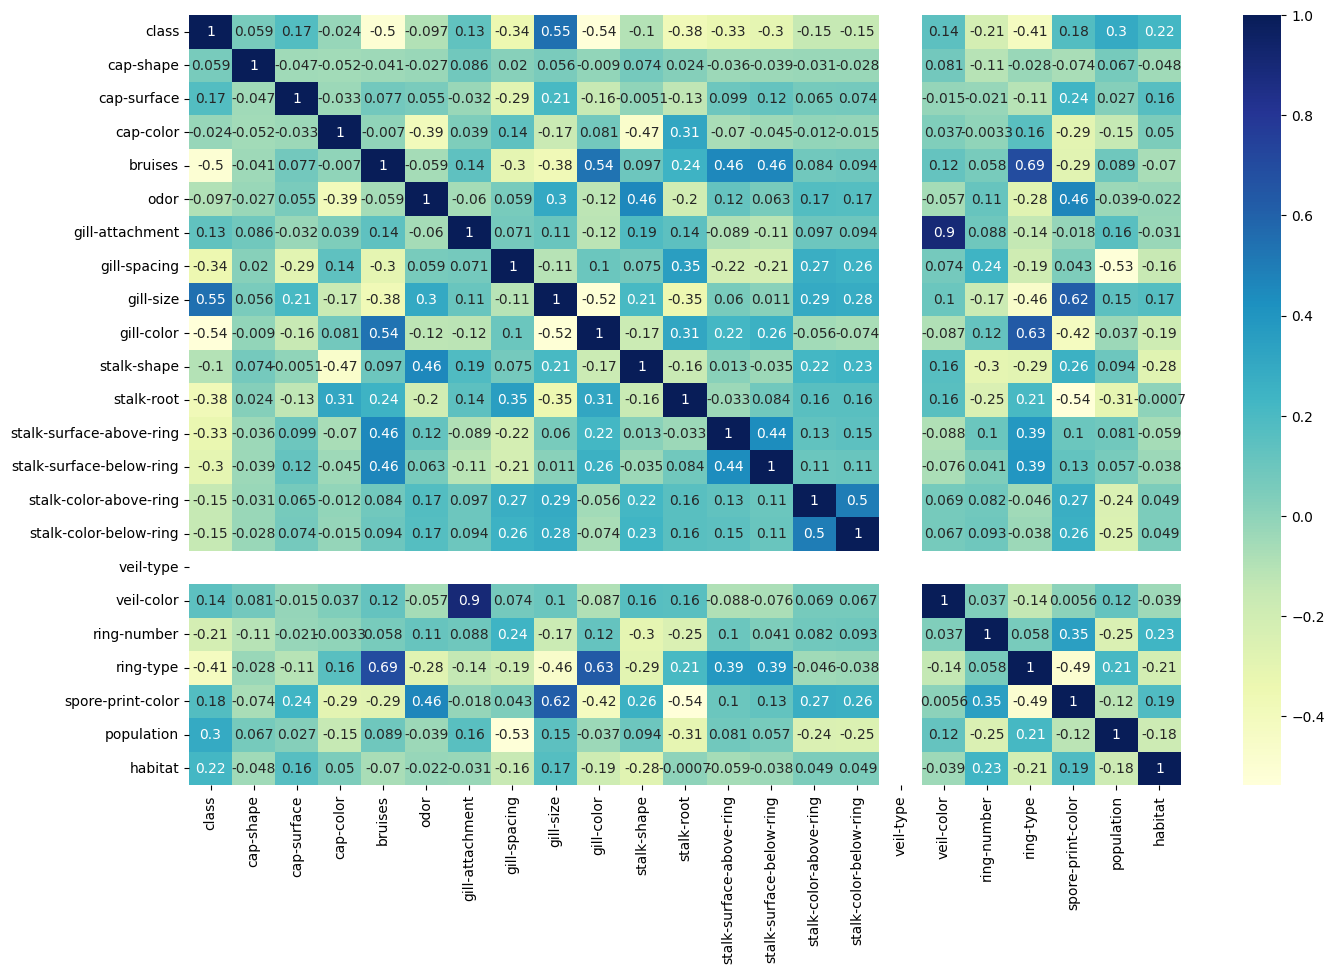

In [75]:
# Now you can create the heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [76]:
selected_columns = ['class','cap-surface', 'gill-attachment', 'gill-size', 'veil-color', 'spore-print-color', 'population','habitat']

# Select those columns from the DataFrame
df_selected = mushrooms[selected_columns]

# Show the selected columns
display (df_selected.head(10))

,class,cap-surface,gill-attachment,gill-size,veil-color,spore-print-color,population,habitat
0,1,2,1,1,2,2,3,5
1,0,2,1,0,2,3,2,1
2,0,2,1,0,2,3,2,3
3,1,3,1,1,2,2,3,5
4,0,2,1,0,2,3,0,1
5,0,3,1,0,2,2,2,1
6,0,2,1,0,2,2,2,3
7,0,3,1,0,2,3,3,3
8,1,3,1,1,2,2,4,1
9,0,2,1,0,2,2,3,3


**Decision Tree**

In [77]:
from sklearn.tree import DecisionTreeClassifier

#X= mushrooms.drop('class', axis=1)
X = mushrooms[['cap-surface', 'gill-attachment', 'gill-size', 'veil-color', 'spore-print-color', 'population','habitat']]
y = mushrooms['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Random Forest model - Accuracy: {accuracy * 100:.2f}%')
print("\nClassification Report:\n\n", report)

Random Forest model - Accuracy: 99.11%

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1040
           1       0.98      1.00      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



**Random Forest**

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

X = mushrooms[['cap-shape','cap-surface', 'gill-attachment', 'gill-size', 'veil-color', 'spore-print-color', 'population','habitat']]
y = mushrooms['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Accuracy of Random Forest model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of Random Forest model: 99.36%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1040
           1       0.99      1.00      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



**SVC**

In [79]:
from sklearn.svm import SVC

X = mushrooms[['cap-surface', 'gill-attachment', 'gill-size', 'veil-color', 'spore-print-color', 'population','habitat']]
y = mushrooms['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

svc_model = SVC(kernel='linear')

svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)


print(f'Accuracy of Random Forest model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of Random Forest model: 84.05%

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      1040
           1       0.88      0.78      0.83       991

    accuracy                           0.84      2031
   macro avg       0.85      0.84      0.84      2031
weighted avg       0.84      0.84      0.84      2031



**KNN**

In [80]:
from sklearn.neighbors import KNeighborsClassifier

X = mushrooms[['cap-surface', 'gill-attachment', 'gill-size', 'veil-color', 'spore-print-color', 'population','habitat']]
y = mushrooms['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Accuracy of Random Forest model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of Random Forest model: 99.21%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1040
           1       0.99      0.99      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



**XGBoost**

In [81]:
import xgboost as xgb


X = mushrooms[['cap-surface', 'gill-attachment', 'gill-size', 'veil-color', 'spore-print-color', 'population','habitat']]
y = mushrooms['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = xgb.XGBClassifier( eval_metric='mlogloss')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'Accuracy of Random Forest model: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

Accuracy of Random Forest model: 99.11%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1040
           1       0.98      1.00      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

